<a href="https://colab.research.google.com/github/Shereen74/graduation_project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/GP

/content/drive/MyDrive/GP


In [ ]:
!pwd

/content/drive/MyDrive/GP


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading files

In [ ]:
weather_data = pd.read_csv('./ashrae-energy-prediction/weather_train.csv')
building_data = pd.read_csv('./ashrae-energy-prediction/building_metadata.csv')

In [ ]:
counter = 0
batch_size = 1000000
train_data = []
for chunk in pd.read_csv('./ashrae-energy-prediction/train.csv', chunksize=batch_size):

    train_data.append(chunk)
    counter += 1

train_data

[        building_id  meter            timestamp  meter_reading
 0                 0      0  2016-01-01 00:00:00         0.0000
 1                 1      0  2016-01-01 00:00:00         0.0000
 2                 2      0  2016-01-01 00:00:00         0.0000
 3                 3      0  2016-01-01 00:00:00         0.0000
 4                 4      0  2016-01-01 00:00:00         0.0000
 ...             ...    ...                  ...            ...
 999995         1244      1  2016-01-19 03:00:00        22.9297
 999996         1244      3  2016-01-19 03:00:00      1050.9600
 999997         1245      0  2016-01-19 03:00:00        65.6562
 999998         1245      1  2016-01-19 03:00:00         0.0000
 999999         1245      2  2016-01-19 03:00:00       867.3520
 
 [1000000 rows x 4 columns],
          building_id  meter            timestamp  meter_reading
 1000000         1246      0  2016-01-19 03:00:00        49.0000
 1000001         1246      1  2016-01-19 03:00:00         0.0000
 10000

In [ ]:
train_data = pd.concat(train_data)
train_data.shape

(20216100, 4)

In [ ]:
weather_data.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [ ]:
weather_data.tail()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [ ]:
weather_data.describe() # Exploring the mean value, max value for each column

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


In [ ]:
weather_data.info() # Exploring data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [ ]:
building_data.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [ ]:
building_data.tail()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN
1448,15,1448,Office,92271,2001.0,NaN


In [ ]:
building_data.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [ ]:
building_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [ ]:
train_data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:
train_data.tail()

,building_id,meter,timestamp,meter_reading
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575
20216099,1448,0,2016-12-31 23:00:00,2.850


In [ ]:
train_data.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


# Merging files

In [ ]:
#Merging train data
train = train_data.merge(building_data, on='building_id', how='left')
train = train.merge(weather_data, on=['site_id', 'timestamp'], how='left')

# Explore Data

In [ ]:
meter_df = train.groupby('meter')['building_id'].nunique() # Number of unique building IDs

for meter, count in meter_df.items():
    print(f"Number of buildings with meter {meter}: {count}")

Number of buildings with meter 0: 1413
Number of buildings with meter 1: 498
Number of buildings with meter 2: 324
Number of buildings with meter 3: 145


In [ ]:
print("number of unique building ID's :", train['building_id'].nunique())

number of unique building ID's : 1449


# Data Visualization

## Checking for any noise and outliers

Functions:
- whole_year_reading: it takes a building id and a meter type and visualizes the meter reading for the whole year

- reading_of_onemeter: it takes 1 meter type and displays the meter reading of one meter type for a whole year, discovering which meter types are consumed the most. 

- customized_histogram: it takes the dataset and the attribute that would be displayed

In [ ]:
def whole_year_reading(building_id, meter):
    p = train[(train['building_id'] == building_id) & (train['meter'] == meter)] # Extracting the index of 1 meter of 1 building id
    p['day'] = pd.to_datetime(p['timestamp']).dt.dayofyear # Extracting day of a year from timestamp
    p1 = p.groupby('day')['meter_reading'].sum() # Grouping by day to sum meter_reading

    k = f'Meter reading of building {building_id} with meter {meter}' # The title of the plot
    p1 = p1.astype(float)


    # Details of my plot
    plt.figure(figsize=(17, 9))
    plt.title(k)
    plt.xlabel('Timestamp in days')
    plt.ylabel('Meter Reading')
    plt.plot(p1)
    
    return p

<ipython-input-43-78c1c6607de7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['day'] = pd.to_datetime(p['timestamp']).dt.dayofyear # Extracting day of a year from timestamp


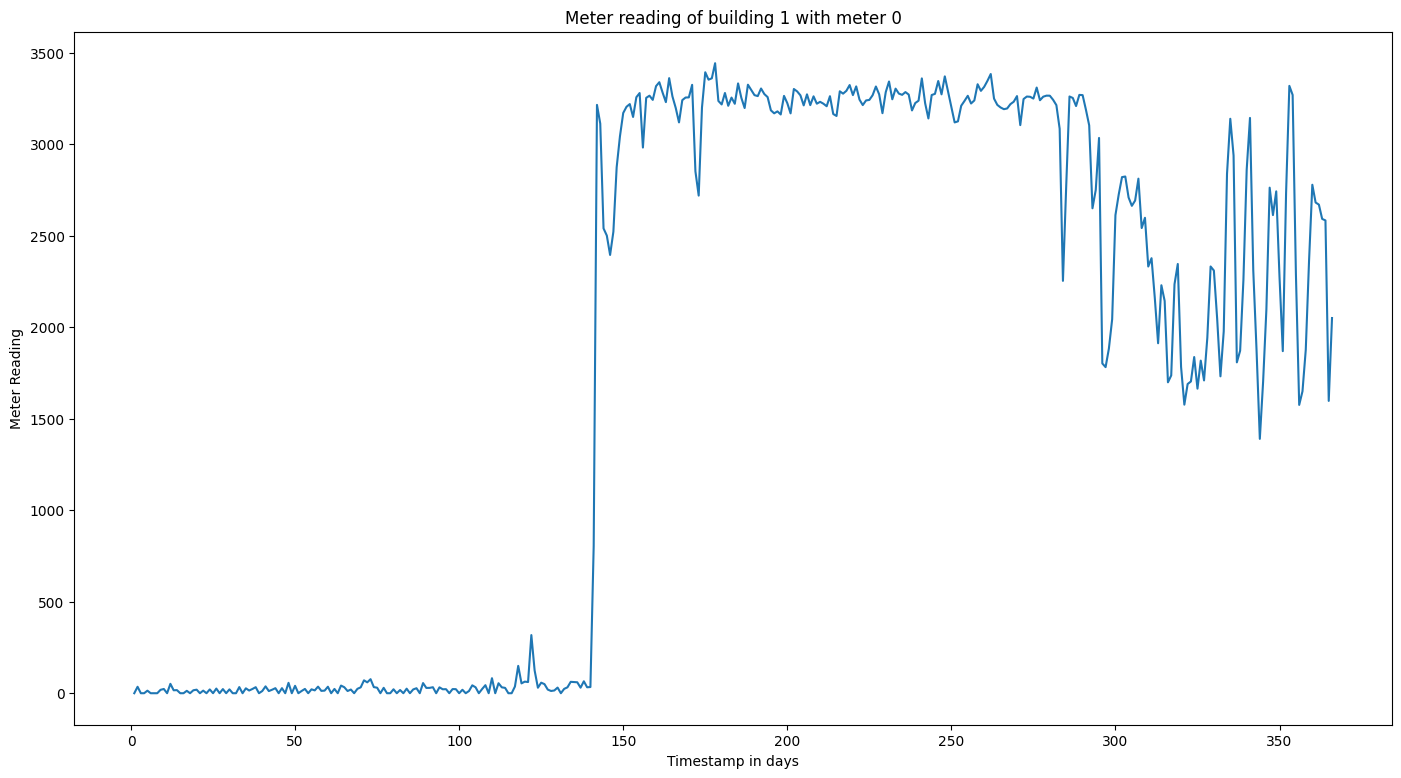

In [ ]:
building_id = 1
meter_type_id = 0
figure1 = whole_year_reading(building_id, meter_type_id) 

In [ ]:
# This function displays the meter reading of one meter type for a whole year
# Discovering which meter types are consumed the most. 
def reading_of_onemeter(meter):
    if meter == 0:
          k = 'Meter reading of all buildings with meter 0 : Electricity'
          # print("Case 1")
    elif meter == 1:
          # Case 2
          k = 'Meter reading of all buildings with meter 1 : Chilled water'
    elif meter == 2:
          # Case 3
          k = 'Meter reading of all buildings with meter 2 : Steam'
    elif meter == 3:
          k = 'Meter reading of all buildings with meter 3 : Hot Water'
    else:
          k = 'Incorrect meter type'

    p = train[train['meter'] == meter]
    p['day'] = pd.to_datetime(p['timestamp']).dt.dayofyear
    p1 = p.groupby('day')['meter_reading'].mean()

    # Details of my plot
    p1 = p1.astype(float) 
    plt.figure(figsize=(17, 9))
    plt.title(k)
    plt.xlabel('Timestamp in days')
    plt.ylabel('Meter Reading')
    plt.plot(p1)
      
    return p

<ipython-input-50-2b37ded885b6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['day'] = pd.to_datetime(p['timestamp']).dt.dayofyear


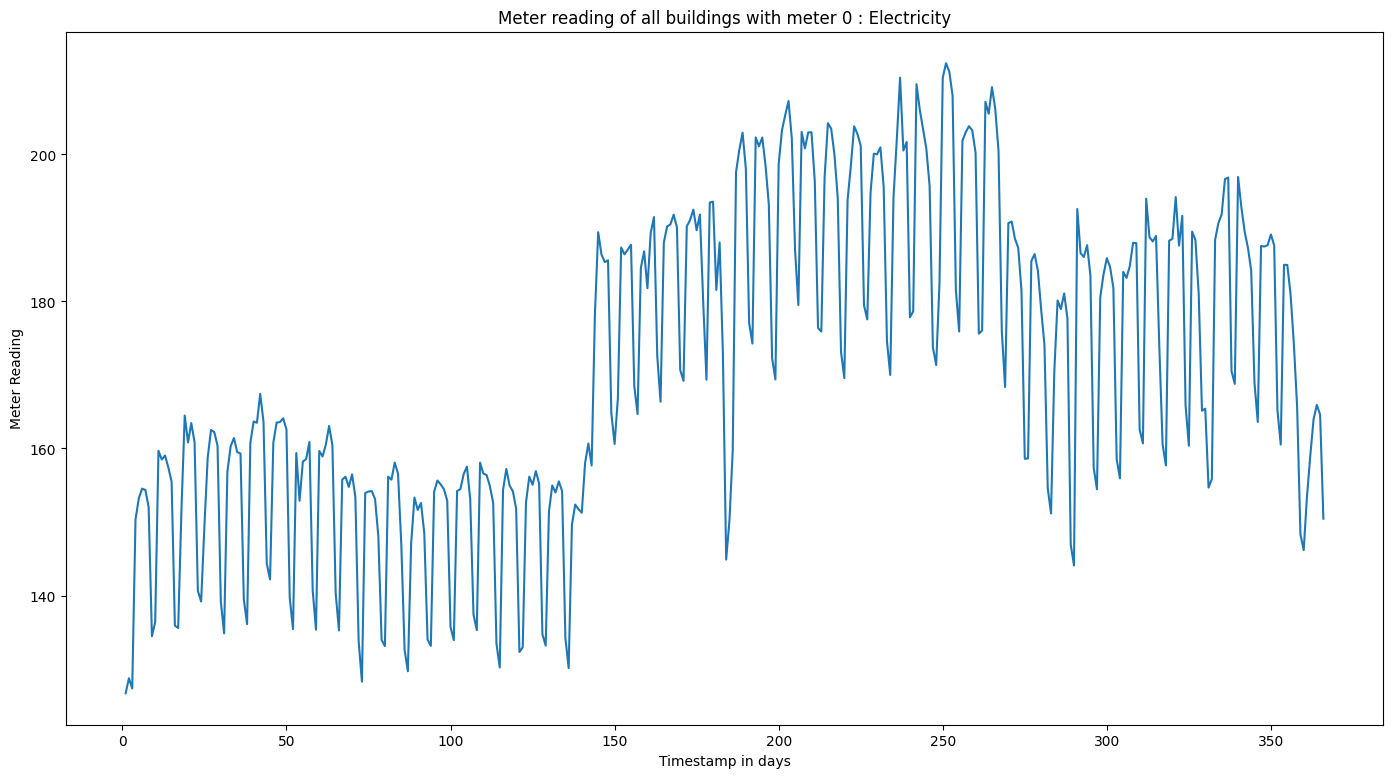

In [ ]:
meter_type = 0 # Electricity
figure2 = reading_of_onemeter(meter_type)

<ipython-input-50-2b37ded885b6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['day'] = pd.to_datetime(p['timestamp']).dt.dayofyear


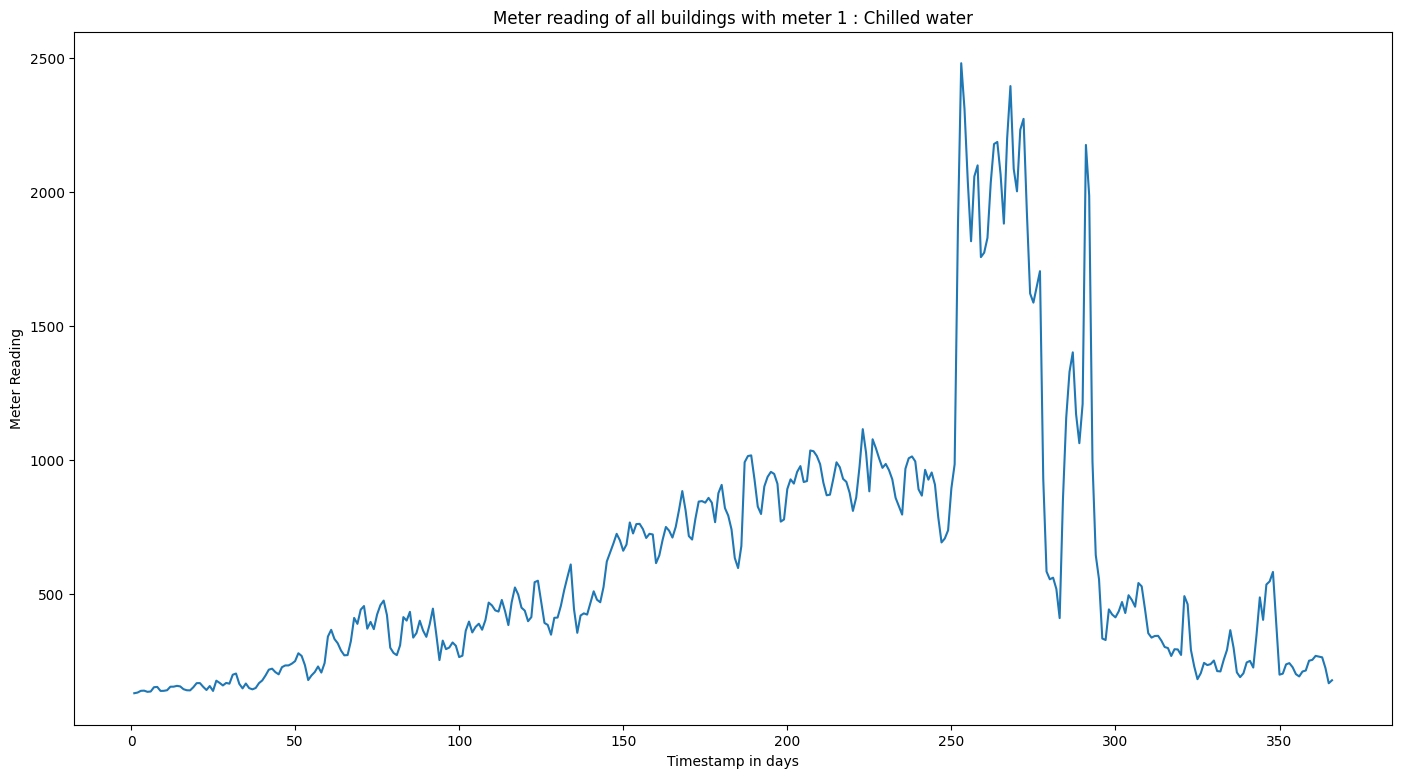

In [ ]:
meter_type = 1 # Chilled Water
figure2 = reading_of_onemeter(meter_type)

<ipython-input-50-2b37ded885b6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['day'] = pd.to_datetime(p['timestamp']).dt.dayofyear


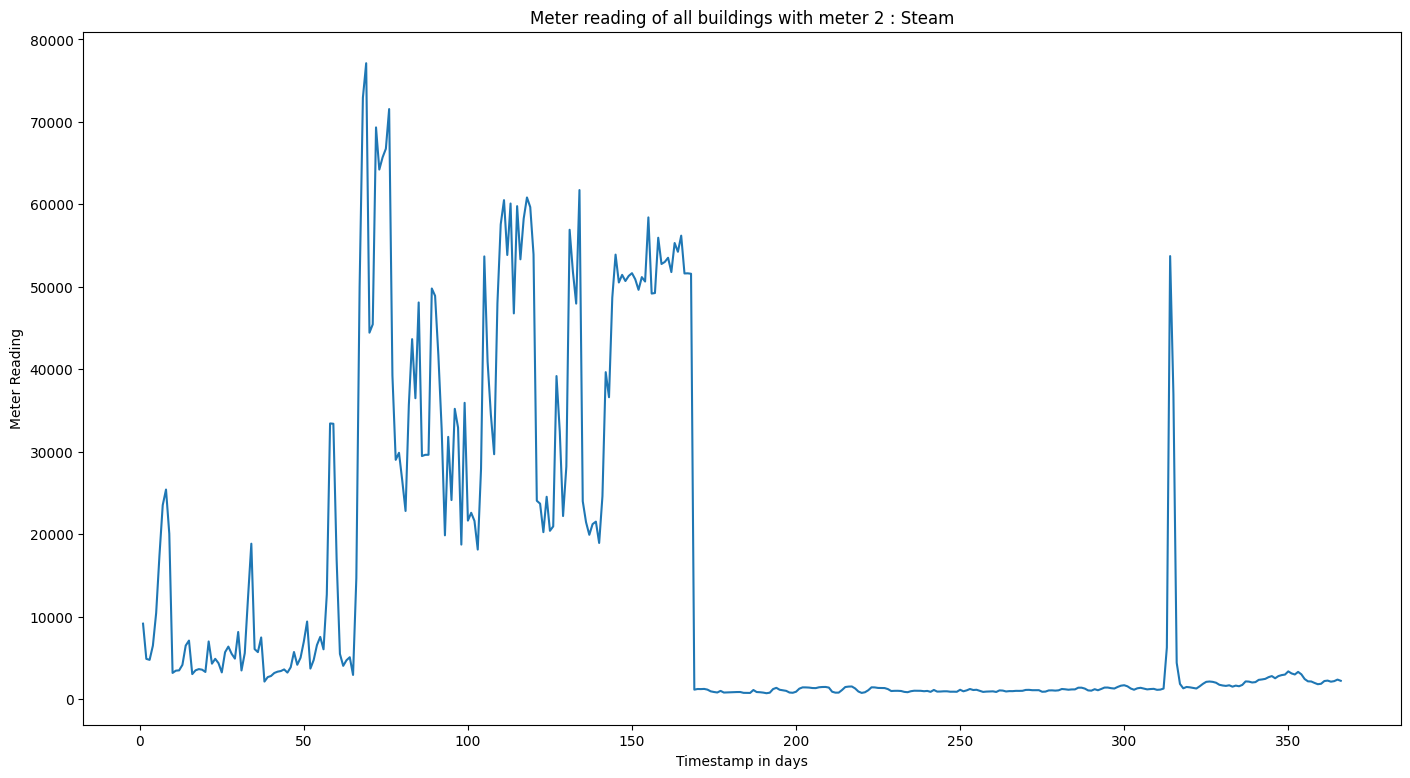

In [ ]:
meter_type = 2 # Electricity
figure2 = reading_of_onemeter(meter_type)

<ipython-input-50-2b37ded885b6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['day'] = pd.to_datetime(p['timestamp']).dt.dayofyear


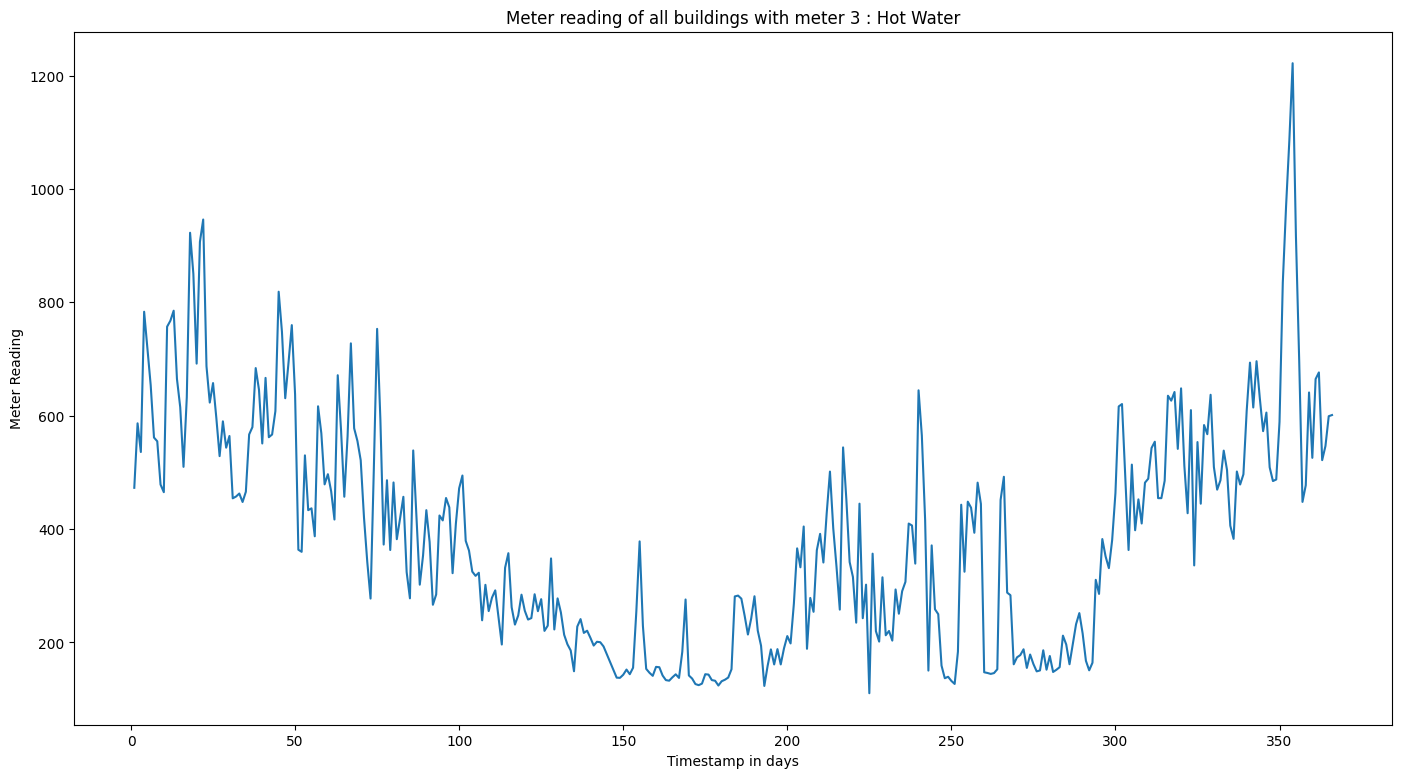

In [ ]:
meter_type = 3 # Hot Water
figure2 = reading_of_onemeter(meter_type)

## Building Metadata Analysis

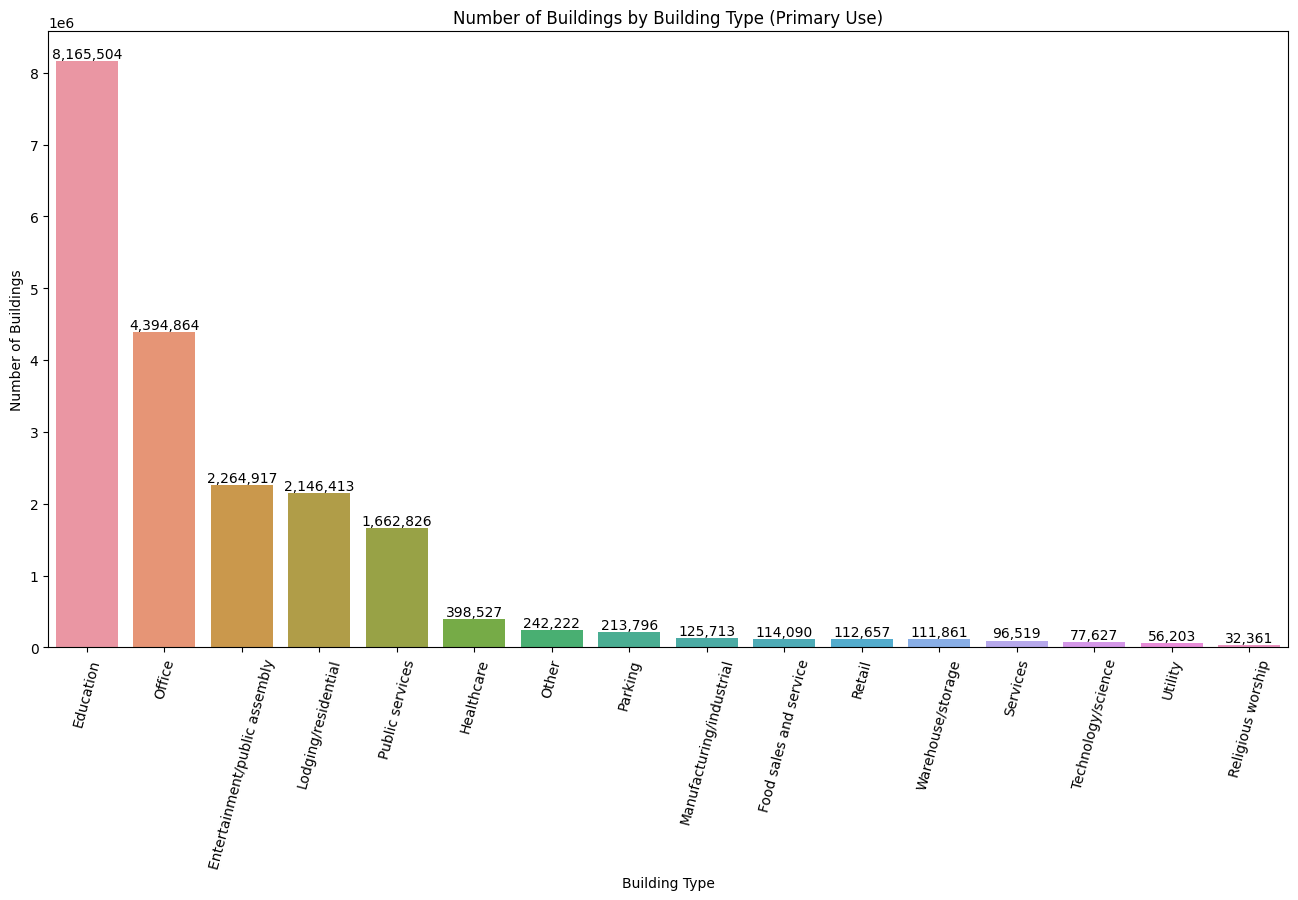

In [ ]:
# Count the number of buildings for each type
building_counts = train['primary_use'].value_counts()

# Plot the number of buildings for each type
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = building_counts.index, y = building_counts.values)
plt.title("Number of Buildings by Building Type (Primary Use)")
plt.xlabel("Building Type")
plt.ylabel("Number of Buildings")
plt.xticks(rotation=75)

# Add the building numbers on the bar plot
for i, count in enumerate(building_counts.values):
    ax.text(i, count, '{:,}'.format(count), ha='center', va='bottom') 


plt.show()

In [ ]:
100 * (building_data.isnull().sum() / len(building_data))

site_id         0.000000
building_id     0.000000
primary_use     0.000000
square_feet     0.000000
year_built     53.416149
floor_count    75.500345
dtype: float64

In [ ]:
def customize_histogram(data, attribute):
    plt.hist(data[attribute], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {attribute}")
    plt.xlabel(attribute)
    plt.ylabel("Frequency")
    plt.show()

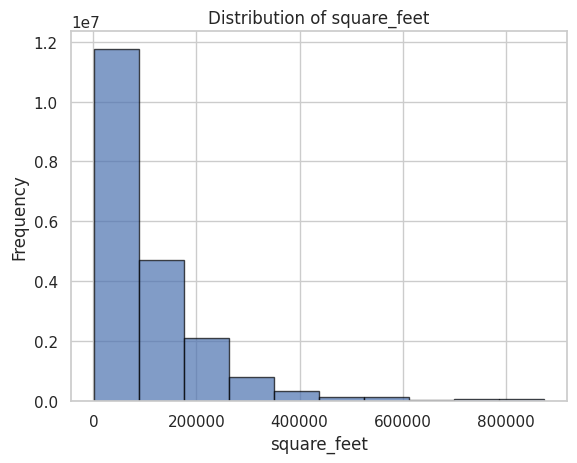

In [ ]:
customize_histogram(train, 'square_feet') # Only showing the distribution of square feet

## Weather Data Analysis

## Data Correlation Analysis

<ipython-input-83-57c5ca5b9d8f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr()*10,vmin=-1,vmax=10,linewidths=1,annot=True,annot_kws={"size": 10},fmt="g",ax=ax,cmap="YlGnBu")


<Axes: >

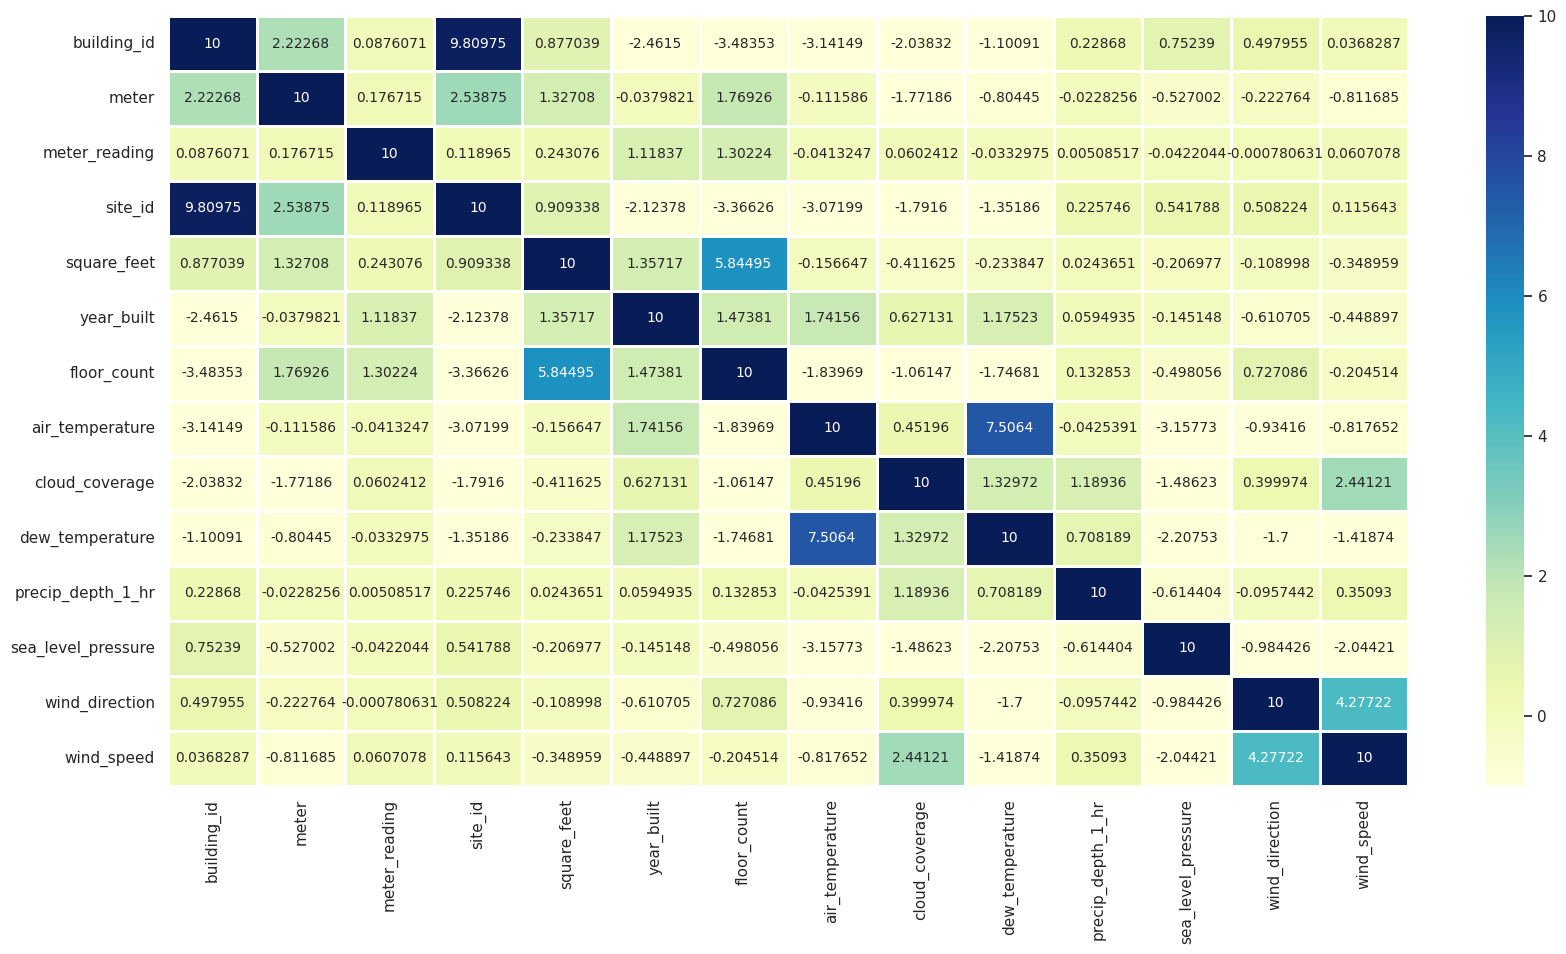

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(train.corr()*10,vmin=-1,vmax=10,linewidths=1,annot=True,annot_kws={"size": 10},fmt="g",ax=ax,cmap="YlGnBu")

Identifying potential cause-and-effect relationships between variables.
- floor_count and square_feet are highly correlated
- wind_speed and cloud_coverage
- meter and site_id

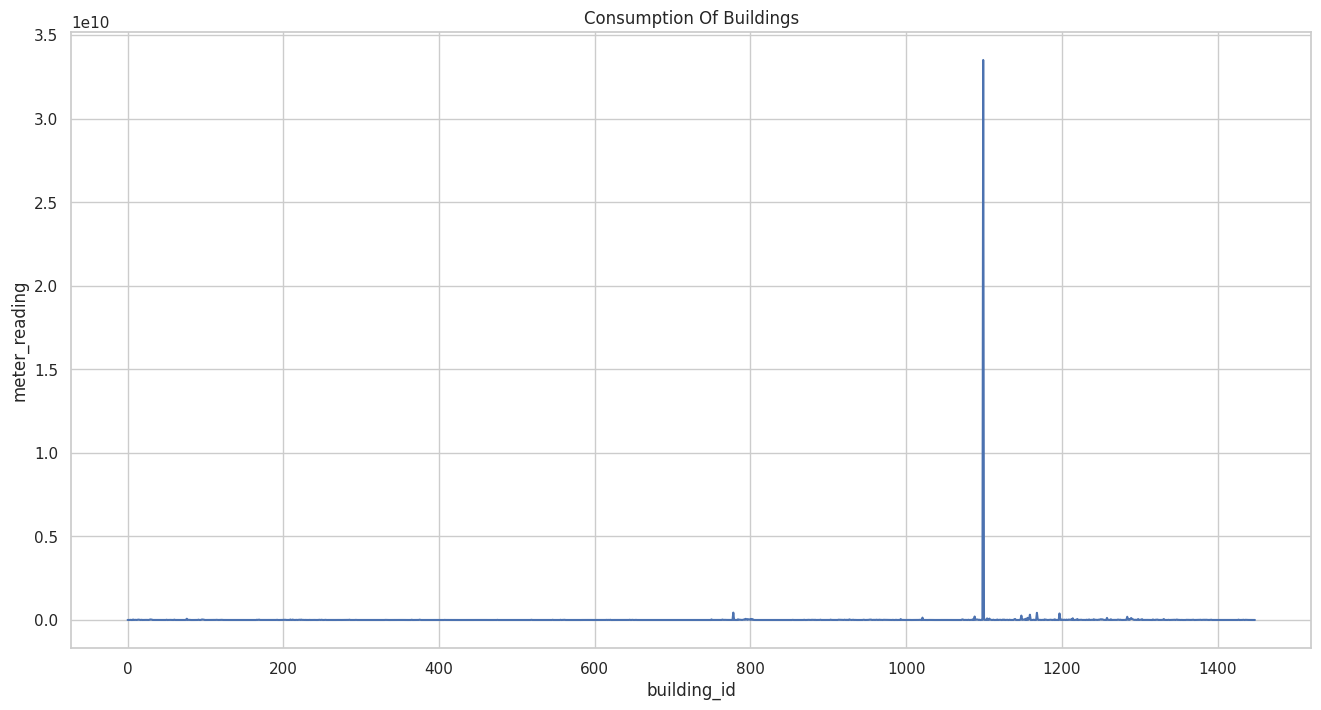

In [ ]:
p = train.groupby(["building_id"])["meter_reading"].sum()
p.astype('float')

k = 'Consumption Of Buildings'

plt.figure(figsize=(16,8))
plt.title(k)
plt.xlabel('building_id')
plt.ylabel('meter_reading')
plt.plot(p)

Found an outlier of building id between 1000 and 1200

In [ ]:
# Find the outlier building ID
outlier_building_id = p.idxmax()  # Assuming the outlier is the building with the maximum meter_reading
outlier_reading = p.max()

# Print the outlier building ID
print("Outlier Building ID:", outlier_building_id)

Outlier Building ID: 1099


<ipython-input-43-78c1c6607de7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['day'] = pd.to_datetime(p['timestamp']).dt.dayofyear # Extracting day of a year from timestamp


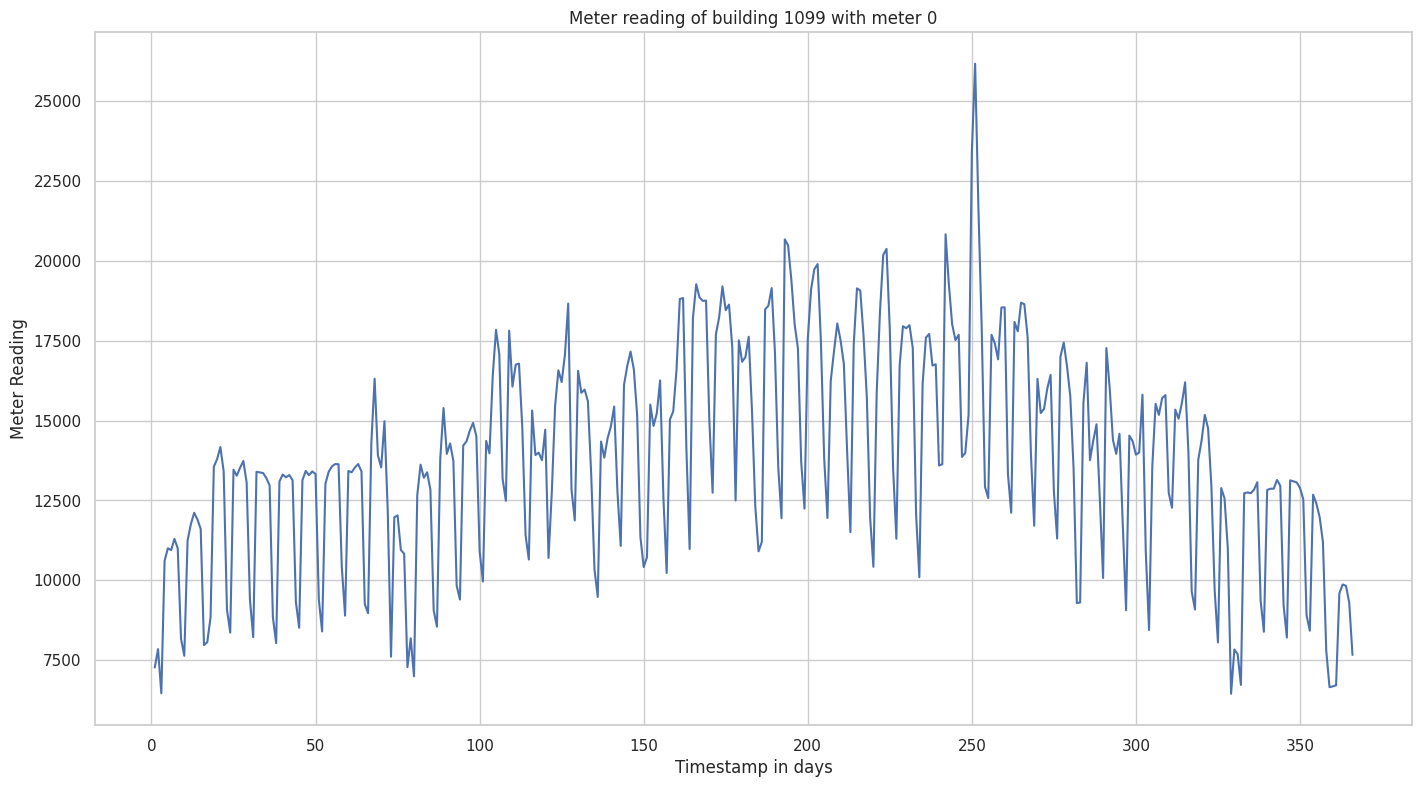

In [ ]:
building_id_out = 1099
meter_type = 0
plot = whole_year_reading(building_id_out, meter_type)

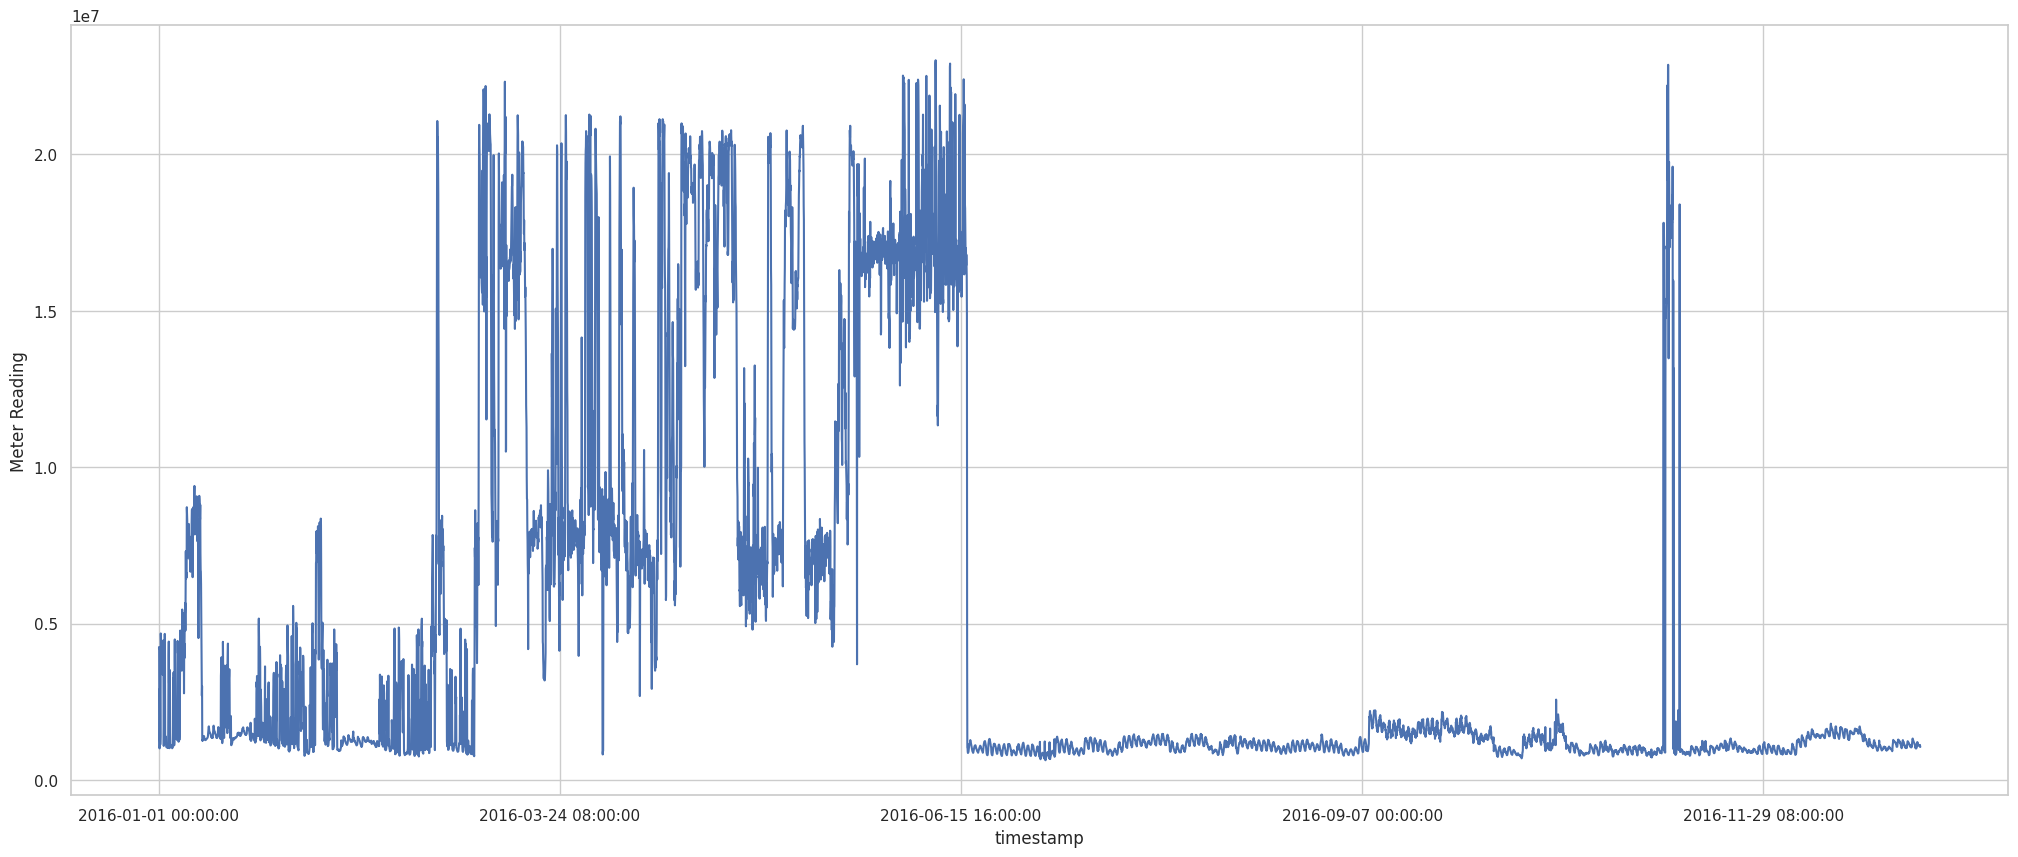

In [ ]:
ts = train.groupby(["timestamp"])["meter_reading"].sum()
ts.astype('float')
fig,ax = plt.subplots(figsize=(25,10))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Meter Reading')
ts.plot(ax=ax, x_compat=True)
plt.show()

Starting from June, the energy consumption is decreasing.